In [83]:
using Plots
using JLD2
using LinearAlgebra
using SparseArrays
using LaTeXStrings
Plots.pyplot()

function prep(history, x_star, num_pass)
    r = history["r"]
    k = history["k"]
    
    
    x = (collect(Float64, (1:length(r)) / length(r) * k))
    y = [LinearAlgebra.norm_sqr(r[i] - x_star) for i in 1:length(r)]
    
    y /= y[1]
    
    return x[1:num_pass], y[1:num_pass]
end

function make_plot(dataset, reg_power, num_pass, xticks, yticks, plot_list; dump_path="dump/", plot_path = "plot/")
    titles = Dict("SM" => "L-SVRG", "ASM" => "L-Katyusha",
        "SVRG" => "SVRG", "Katyusha" => "Katyusha", "SAGA" => "SAGA",
        "Katyusha2" => "Katyusha2", "ASM2" => "L-Katyusha", "ASM3" => "L-Katyusha3")
    
    x_star = zeros(300)
    jldopen(string(dump_path, dataset,"_",reg_power,"_solution"), "a+") do dump
        x_star = dump["x_star"] 
    end
    
    jldopen(string(dump_path, dataset, "_", reg_power), "a+") do file
        println(file)
        Plots.plot(
            yscale=:log,
            xticks=xticks,
            yticks=[10.0^p for p in yticks],
            xlims=(0,num_pass),
            xtickfont = font(15, "Courier"),
            ytickfont = font(15, "Courier"),
            legendfontsize = 15,
            title = "$dataset, \$ \\mu = 10^{$(-reg_power)} \$"
        )
        
        
        for method in plot_list#[[5,4,2,1,3]]
            x,y = prep(file[method], x_star, num_pass)
            Plots.plot!(x,y, linestyle=:auto, lw=2, label=titles[method])
        end
        Plots.pdf(string(plot_path, dataset, "_", reg_power))
    end
end

make_plot (generic function with 2 methods)

# accelerated plot

JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_4 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_5 (read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_6 (read/write)
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 ASM
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_5 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_6 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_7 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/cod-rna_-1 (read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 SVRG
 ├─🔢 Katyusha
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/cod-rna_0 (read/write)
 ├─🔢 ASM
 

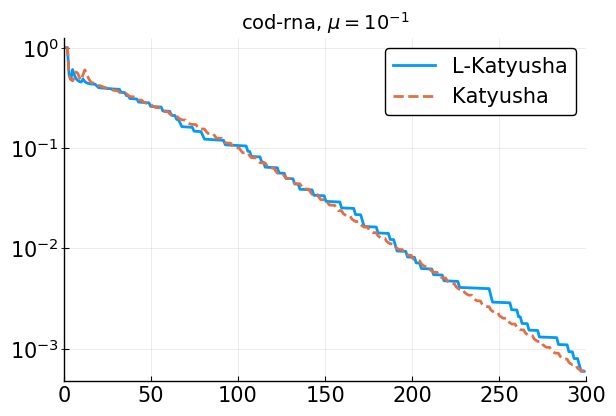

(read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 SVRG
 ├─🔢 Katyusha
 ├─🔢 SAGA
 └─🔢 ASM2


In [73]:
make_plot("w8a", 4, 200, 0:50:200, -30:2:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")
make_plot("w8a", 5, 200, 0:50:200, -30:1:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")
make_plot("w8a", 6, 500, 0:100:500, -10:1:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")

make_plot("a9a", 5, 400, 0:50:400, -30:2:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")
make_plot("a9a", 6, 400,0:50:400, -30:1:10, ["ASM", "Katyusha"], plot_path="plot/accelerated/")
make_plot("a9a", 7, 800, 0:100:800, -30:1:10, ["ASM", "Katyusha"], plot_path="plot/accelerated/")

make_plot("cod-rna", -1, 100, 0:10:100, -30:2:10, ["ASM", "Katyusha"], plot_path="plot/accelerated/")
make_plot("cod-rna", 0, 200,0:50:200, -10:1:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")
make_plot("cod-rna", 1, 300, 0:50:300, -10:1:10, ["ASM2", "Katyusha"], plot_path="plot/accelerated/")

# variance reduced plot

JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_3 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_4 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_5 (read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_6 (read/write)
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 ASM
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_4 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_5 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_6 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA


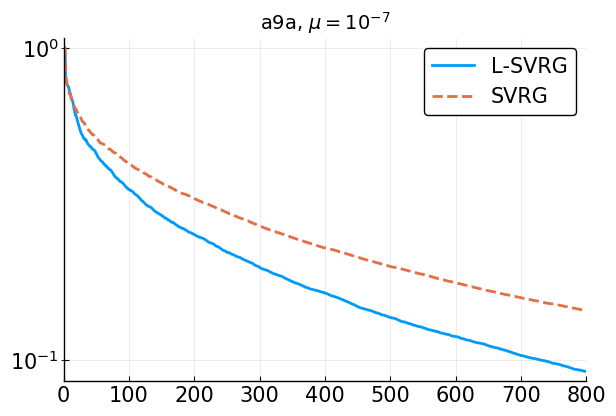

JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_7 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA


In [74]:
make_plot("w8a", 1, 20, 0:2:100, -32:4:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("w8a", 2, 20, 0:2:100, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("w8a", 3, 100, 0:10:100, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("w8a", 4, 200, 0:50:200, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("w8a", 5, 200, 0:50:200, -30:1:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("w8a", 6, 500, 0:100:500, -10:1:10, ["SM", "SVRG"], plot_path="plot/vr/")

make_plot("a9a", 2, 50, 0:10:100, -32:4:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("a9a", 3, 50, 0:10:100, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("a9a", 4, 100, 0:10:100, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("a9a", 5, 400, 0:50:400, -30:2:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("a9a", 6, 400,0:50:400, -30:1:10, ["SM", "SVRG"], plot_path="plot/vr/")
make_plot("a9a", 7, 800, 0:100:800, -30:1:10, ["SM", "SVRG"], plot_path="plot/vr/")

# full

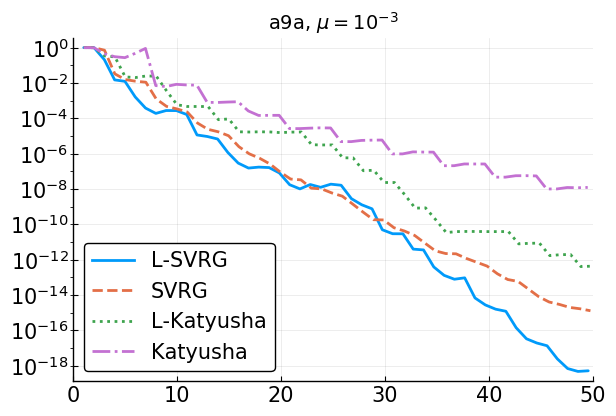

JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_3 (read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 SVRG
 └─🔢 Katyusha


JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_3 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_4 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_5 (read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/w8a_6 (read/write)
 ├─🔢 SM
 ├─🔢 Katyusha
 ├─🔢 ASM
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_4 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_5 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 ├─🔢 SAGA
 └─🔢 ASM2
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_6 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├─🔢 Katyusha
 ├─🔢 SVRG
 └─🔢 SAGA
JLDFile /home/kovaled/Documents/ICML_experiments/dump/a9a_7 (read/write)
 ├─🔢 SM
 ├─🔢 ASM
 ├

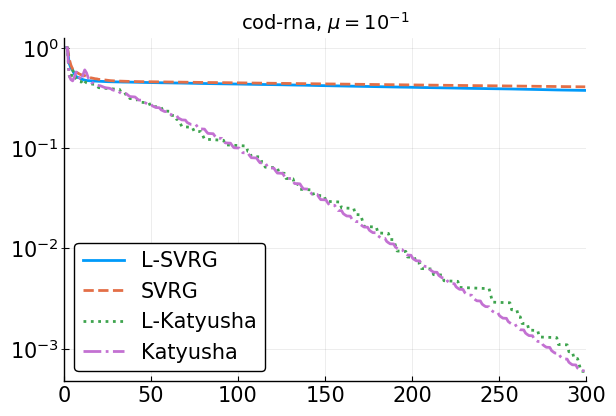

(read/write)
 ├─🔢 ASM
 ├─🔢 SM
 ├─🔢 SVRG
 ├─🔢 Katyusha
 ├─🔢 SAGA
 └─🔢 ASM2


In [75]:
make_plot("w8a", 1, 20, 0:2:100, -32:4:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("w8a", 2, 20, 0:2:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("w8a", 3, 100, 0:10:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("w8a", 4, 200, 0:50:200, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("w8a", 5, 200, 0:50:200, -30:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("w8a", 6, 500, 0:100:500, -10:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")

make_plot("a9a", 2, 50, 0:10:100, -32:4:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("a9a", 3, 50, 0:10:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("a9a", 4, 100, 0:10:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("a9a", 5, 400, 0:50:400, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("a9a", 6, 400,0:50:400, -30:1:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("a9a", 7, 800, 0:100:800, -30:1:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")

make_plot("mushrooms", 3, 100, 0:10:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("mushrooms", 4, 300, 0:50:300, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("mushrooms", 5, 800, 0:100:1000, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("mushrooms", 6, 3000, 0:500:3000, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")

make_plot("phishing", 5, 100, 0:10:100, -10:1:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("phishing", 6, 500, 0:100:500, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("phishing", 7, 1000, 0:200:1000, -10:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")

make_plot("cod-rna", -1, 100, 0:10:100, -30:2:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")
make_plot("cod-rna", 0, 200,0:50:200, -10:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
make_plot("cod-rna", 1, 300, 0:50:300, -10:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")

In [77]:
#make_plot("covtype", 6, 250, 0:50:250, -30:2:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
#make_plot("covtype", 7, 400, 0:50:400, -30:1:10, ["SM", "SVRG", "ASM2", "Katyusha"], plot_path="plot/full/")
#make_plot("covtype", 8, 1300, 0:200:1300, -10:1:10, ["SM", "SVRG", "ASM", "Katyusha"], plot_path="plot/full/")

# parameters

In [315]:
function prep2(history, x_star, num_pass)
    r = history["r"]
    k = history["k"]
    
    
    x = (collect(Float64, (1:length(r)) / length(r) * k))
    y = [LinearAlgebra.norm_sqr(r[i] - x_star) for i in 1:length(r)]
    
    y /= y[1]
    
    return x[1:1:num_pass], y[1:1:num_pass]
end

function make_plot2(dataset, reg_power, num_pass, xticks, yticks; dump_path="dump/", plot_path = "plot/p/")
    titles = Dict("SM" => "L-SVRG", "ASM" => "L-Katyusha",
        "SVRG" => "SVRG", "Katyusha" => "Katyusha", "SAGA" => "SAGA",
        "Katyusha2" => "Katyusha2", "ASM2" => "L-Katyusha", "ASM3" => "L-Katyusha3")
    
    x_star = zeros(300)
    jldopen(string(dump_path, dataset,"_",reg_power,"_solution"), "a+") do dump
        x_star = dump["x_star"] 
    end
    
    jldopen(string(dump_path, dataset, "_", reg_power, "_p"), "a+") do file
        println(file)
        Plots.plot(
            yscale=:log,
            xticks=xticks,
            yticks=[10.0^p for p in yticks],
            xlims=(0,num_pass),
            xtickfont = font(15, "Courier"),
            ytickfont = font(15, "Courier"),
            legendfontsize = 15,
            title = "$dataset, \$ \\mu = 10^{$(-reg_power)} \$"
        )
        
        idx = 0
        mark_list = [:circle, :cross, :diamond, :dtriangle, :heptagon, :hexagon]
        color_list = [RGB(0.1,0.6,1),RGB(0.9,0.45,0.27),RGB(0.2,0.65,0.3),RGB(0.67,0.55,0.1),RGB(0.8,0.4,0.8)]
        for method in keys(file)
            idx += 1
            
            sz = zeros(20)
            sz[idx * 2] = 12
            
            
            x,y = prep2(file[method], x_star, num_pass)
            st = :dot
            if method[1] == 'L'
                st = :solid
            end
            Plots.plot!(x,y, linestyle=st,
                marker=mark_list[Int(method[3] - '0')],
                color = color_list[Int(method[3] - '0')],
                lw=2, label=method, markersize=sz)
        end
        Plots.pdf(string(plot_path, dataset, "_", reg_power))
    end
end

make_plot2 (generic function with 1 method)

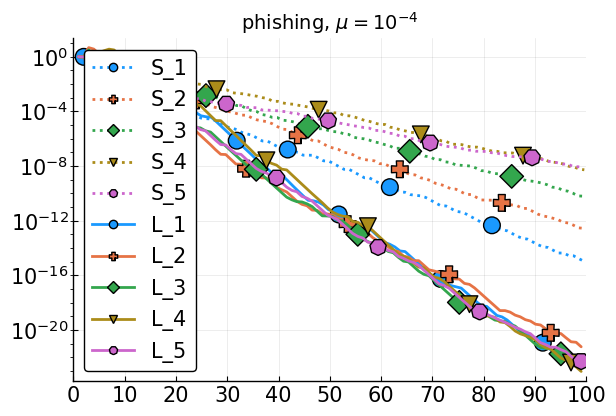

JLDFile /home/kovaled/Documents/ICML_experiments/dump/phishing_4_p (read/write)
 ├─🔢 S_1
 ├─🔢 S_2
 ├─🔢 S_3
 ├─🔢 S_4
 ├─🔢 S_5
 ├─🔢 L_1
 ├─🔢 L_2
 ├─🔢 L_3
 ├─🔢 L_4
 └─🔢 L_5


In [316]:
make_plot2("phishing", 4, 100, 0:10:100, -32:4:10)

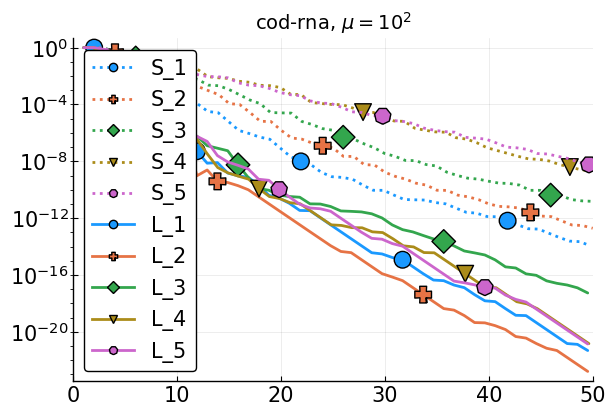

JLDFile /home/kovaled/Documents/ICML_experiments/dump/cod-rna_-2_p (read/write)
 ├─🔢 S_1
 ├─🔢 S_2
 ├─🔢 S_3
 ├─🔢 S_4
 ├─🔢 S_5
 ├─🔢 L_1
 ├─🔢 L_2
 ├─🔢 L_3
 ├─🔢 L_4
 └─🔢 L_5


In [317]:
make_plot2("cod-rna", -2, 50, 0:10:100, -32:4:10)

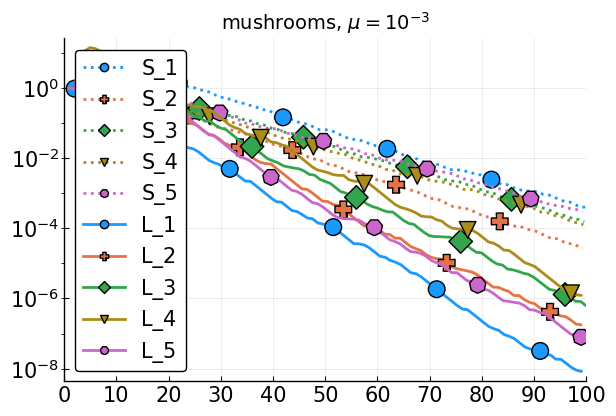

JLDFile /home/kovaled/Documents/ICML_experiments/dump/mushrooms_3_p (read/write)
 ├─🔢 S_1
 ├─🔢 S_2
 ├─🔢 S_3
 ├─🔢 S_4
 ├─🔢 S_5
 ├─🔢 L_1
 ├─🔢 L_2
 ├─🔢 L_3
 ├─🔢 L_4
 └─🔢 L_5


In [318]:
make_plot2("mushrooms", 3, 100, 0:10:100, -32:2:10)